In [1]:
import os
import numpy as np
import pandas as pd
pd.set_option('display.max_columns',50)
pd.set_option('display.max_rows',50)
pd.options.mode.chained_assignment = None

import random
random.seed(68)

from pandarallel import pandarallel
pandarallel.initialize(nb_workers=20)

from rdkit import Chem
from rdkit.Chem import PandasTools



INFO: Pandarallel will run on 20 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.


In [2]:
import sys
sys.path.append('../')
from Draw_fig import Draw_plot
from standardization_process import *

In [3]:
def process_stage_1(df,smi_col):
    df[smi_col] = df[smi_col].parallel_apply(smi_to_smi)
    df = df[~df[smi_col].isna()]
    df = smiles_check(df , smi_col)
    df = df[df['Smiles_check'] != False]
    df = remove_salt(df, smi_col)
    metal_index = metal_check(df, 'Smiles_removesalt')
    df = df[~df.index.isin(metal_index)]
    df = smiles_unify(df, 'Smiles_removesalt')
    df['AtomCounts'] = df[smi_col].apply(lambda x: Chem.MolFromSmiles(x).GetNumAtoms())
    df = df[df['AtomCounts'] <=100]
    return df 

# Summary for the raw data

In [5]:
Chembl = pd.read_csv('../data/data_mining_results/Plasma_Protein_Binding/ppb_Chembl_data_mining_finished.csv')


In [9]:
Chembl = Chembl[~Chembl['Plasma_Protein_Binding'].isna()]

In [11]:
Chembl.shape

(3381, 21)

In [12]:
Chembl['Assay ChEMBL ID'].nunique()

1296

### Chembl

In [17]:
Chembl = pd.read_csv('../data/data_mining_results/Plasma_Protein_Binding/ppb_Chembl_data_mining_finished.csv')

In [18]:
Chembl.head()

,Molecule ChEMBL ID,Smiles,Standard Type,Standard Relation,Standard Value,Standard Units,Assay ChEMBL ID,Assay Description,Assay Type,BAO Format ID,BAO Label,Document ChEMBL ID,Source Description,Document Journal,Document Year,Species/Origin of Plasma or Serum,Concentration of Tested Compound,Duration of Incubation,Analytical Detection Method,Equilibrium Dialysis for Protein Binding Assessment,Plasma_Protein_Binding
0,CHEMBL1223528,Cc1cc2n[nH]c(=O)n2c2cc(-c3cn[nH]c3)ccc12,PPB,'=',1.3,%,CHEMBL1228392,Protein binding in plasma,A,BAO_0000366,cell-free format,CHEMBL1221270,Scientific Literature,Bioorg Med Chem Lett,2010.0,NaN,NaN,NaN,NaN,NaN,True
1,CHEMBL374975,CC(=O)O[C@H]1C[C@@]2(C)[C@@H](C[C@@H](O)[C@H]3...,PPB,'=',97.0,%,CHEMBL1661509,Protein binding in serum,A,BAO_0000366,cell-free format,CHEMBL1649135,Scientific Literature,Antimicrob Agents Chemother,2009.0,NaN,NaN,NaN,NaN,NaN,True
2,CHEMBL2235849,CC(C)Cc1ccc(C(C)C(=O)OCc2ccccc2)cc1,PPB,'=',37.0,%,CHEMBL3048171,Protein binding in plasma at 20 ug/ml,A,BAO_0000366,cell-free format,CHEMBL3046468,Scientific Literature,Med Chem Res,2012.0,NaN,20 ug/ml,NaN,NaN,NaN,True
3,CHEMBL2235855,COC(=O)C(Cc1ccccc1)NC(=O)C(C)c1ccc(CC(C)C)cc1,PPB,'=',47.0,%,CHEMBL3048171,Protein binding in plasma at 20 ug/ml,A,BAO_0000366,cell-free format,CHEMBL3046468,Scientific Literature,Med Chem Res,2012.0,NaN,20 ug/ml,NaN,NaN,NaN,True
4,CHEMBL378093,Nc1noc2ccc(-n3nc(C(F)(F)F)c4c3C(=O)N(c3ccc(-c5...,PPB,'=',97.0,%,CHEMBL900675,Protein binding in human serum by equilibrium ...,A,BAO_0000366,cell-free format,CHEMBL1137566,Scientific Literature,J Med Chem,2007.0,Human Serum,NaN,NaN,Equilibrium Dialysis,Equilibrium Dialysis,True


In [19]:
Chembl = Chembl[Chembl['Standard Relation'] == "'='"]
Chembl = Chembl[Chembl['Standard Units'] == '%']
Chembl['Plasma_Protein_Binding'] = Chembl['Plasma_Protein_Binding'].fillna(False)
Chembl = Chembl[Chembl['Plasma_Protein_Binding']]

In [20]:
Chembl.columns

Index(['Molecule ChEMBL ID', 'Smiles', 'Standard Type', 'Standard Relation',
       'Standard Value', 'Standard Units', 'Assay ChEMBL ID',
       'Assay Description', 'Assay Type', 'BAO Format ID', 'BAO Label',
       'Document ChEMBL ID', 'Source Description', 'Document Journal',
       'Document Year', 'Species/Origin of Plasma or Serum',
       'Concentration of Tested Compound', 'Duration of Incubation',
       'Analytical Detection Method',
       'Equilibrium Dialysis for Protein Binding Assessment',
       'Plasma_Protein_Binding'],
      dtype='object')

In [21]:
Chembl = process_stage_1(Chembl,'Smiles')

100%|█████████████████████████████████████████| 3202/3202 [00:00<00:00, 8578.66it/s]


SANITIZE_NONE    3202
Name: Smiles_check, dtype: int64


100%|██████████████████████████████████████| 3202/3202 [00:00<00:00, 1146015.99it/s]
3202it [00:03, 1037.03it/s]


Metal in Smiles amount: 0


100%|█████████████████████████████████████████| 3202/3202 [00:00<00:00, 9664.38it/s]


In [22]:
Chembl['value'] = Chembl['Standard Value']
Chembl = Chembl[(Chembl['value'] <150) & (Chembl['value'] >= 0)]

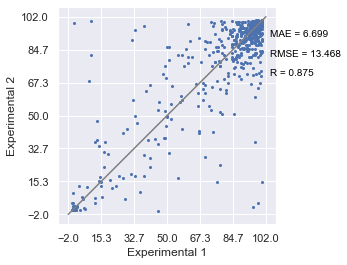

In [23]:
plot_diagram(Chembl,['Smiles_unify'],'value')

In [24]:
for experiment in [  'Species/Origin of Plasma or Serum',
       'Concentration of Tested Compound', 'Duration of Incubation',
       'Analytical Detection Method',
       'Equilibrium Dialysis for Protein Binding Assessment']:
    display(Chembl[experiment].value_counts(dropna=False))

Human                            958
Mouse                            420
Rat                              411
Human Plasma                     288
NaN                              191
                                ... 
Guinea pig                         1
C57BL/6 Mouse                      1
OATP Knock Out Wistar Han Rat      1
Han Wistar Rat Plasma              1
Wistar Han male rat                1
Name: Species/Origin of Plasma or Serum, Length: 92, dtype: int64

NaN                  2028
5 uM                  316
10 uM                 213
1 uM                  185
2 uM                  110
                     ... 
200 mg/kg               1
125 mg                  1
500 to 5000 ng/ml       1
0.5 ug/ml               1
400 mg                  1
Name: Concentration of Tested Compound, Length: 67, dtype: int64

NaN                                          2004
4 hrs                                         416
5 hrs                                         200
6 hrs                                         123
18 hrs                                         92
15 mins                                        48
30 mins                                        37
24 hrs                                         35
1 hr                                           21
1 hr preincubation                             20
120 mins                                       20
2 hrs                                          20
4.2 hrs                                        17
48 hrs                                         16
16 hrs                                         14
3 to 6 hrs                                      9
after 24 hrs                                    6
5 hr                                            6
up to 24 hrs                                    6
8 hrs                                           6


NaN                                                1770
LC-MS/MS                                            621
Equilibrium Dialysis                                158
LC-MS                                               117
LC/MS/MS                                             81
Rapid Equilibrium Dialysis                           65
UC-LC/MS/MS                                          42
HPLC                                                 39
Dialysis                                             35
HPLC-MS                                              32
UPLC-MS/MS                                           27
HPLC-MS/MS                                           26
Ultracentrifugation                                  18
RF-MS                                                18
Ultrafiltration                                      11
LCMS                                                 11
ESI-LC/MS/MS                                         10
LC/MS                                           

NaN                           2449
Equilibrium Dialysis           324
Rapid Equilibrium Dialysis     286
Ultracentrifugation             42
Relative to Control             24
Balanced Dialysis               22
Ultrafiltration                 13
Dialysis                         6
Red Equilibrium Dialysis         5
High-Throughput Dialysis         3
Toribara Dialysis                2
Equilibrium Analysis             1
Name: Equilibrium Dialysis for Protein Binding Assessment, dtype: int64

In [25]:
Chembl['value'] = Chembl['Standard Value'].copy(deep=True)

In [26]:
Chembl['Species/Origin of Plasma or Serum'] = Chembl['Species/Origin of Plasma or Serum'].fillna('Unknown')

In [27]:
Chembl = Chembl[Chembl['Species/Origin of Plasma or Serum'].map(lambda x:x.lower()).str.contains('human')]

In [28]:
Chembl = Chembl[~Chembl['Concentration of Tested Compound'].isin(['2 g','1 g'])]

Chembl['Concentration of Tested Compound'].value_counts()

5 uM                    147
10 uM                   105
1 uM                     71
2 uM                     36
1 ug/ml                  33
5 mM                     10
0.5 mg/ml                 9
50 uM                     9
10 ug/mL                  6
1 mM                      5
150 uM                    5
100 ug/ml                 3
100 mg                    3
30 to 1000 ng/ml          2
20 uM                     2
0.2 mg/ml                 1
0.2 g                     1
0.25 mg/ml                1
0.6 g                     1
0.5 to 2 uM               1
400 mg                    1
20 mg/kg                  1
200 mg/kg                 1
125 mg                    1
40 uM                     1
0.2 to 20 uM              1
0.3 ug/ml                 1
0.0002 to 1000 mg/ml      1
1 to 100 uM               1
Name: Concentration of Tested Compound, dtype: int64

In [29]:
Chembl = Chembl[~Chembl['Duration of Incubation'].isin(['48 hrs'])]

Chembl['Duration of Incubation'].value_counts()

4 hrs                                      186
5 hrs                                       98
18 hrs                                      91
6 hrs                                       46
30 mins                                     23
1 hr                                        16
24 hrs                                      15
120 mins                                    10
3 to 6 hrs                                   9
2 hrs                                        9
30 mins preincubation followed by 4 hrs      5
60 mins                                      4
16 hrs                                       3
up to 6 hrs                                  3
2 to 6 hrs                                   2
20 mins                                      2
240 mins                                     2
8 hrs                                        1
4.5 hrs                                      1
2 mins                                       1
60 to 120 mins                               1
5 to 10 mins 

In [30]:
# Chembl = Chembl[~Chembl['Duration of Incubation'].isin(['48 hrs'])]

Chembl['Analytical Detection Method'].value_counts()

LC-MS/MS                                          249
Equilibrium Dialysis                               72
LC/MS/MS                                           61
LC-MS                                              28
HPLC                                               27
HPLC-MS/MS                                         21
Rapid Equilibrium Dialysis                         19
HPLC-MS                                            19
RF-MS                                              18
Dialysis                                           14
UV-UPLC                                            10
RP-UHPLC                                            9
Ultracentrifugation                                 8
UPLC                                                6
UPLC-MS/MS                                          5
Ultrafiltration                                     5
LC-ESI-MS/MS                                        4
RP-HPLC                                             4
LC/MS                       

In [31]:

Chembl['Equilibrium Dialysis for Protein Binding Assessment'].value_counts()

Rapid Equilibrium Dialysis    181
Equilibrium Dialysis          132
Relative to Control            12
Ultracentrifugation            12
Ultrafiltration                 9
Balanced Dialysis               2
High-Throughput Dialysis        1
Name: Equilibrium Dialysis for Protein Binding Assessment, dtype: int64

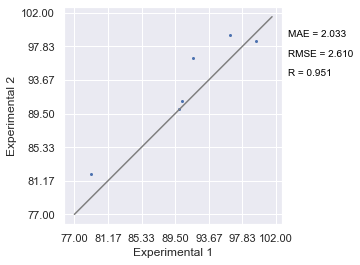

In [32]:
plot_diagram(Chembl,['Smiles_unify','Concentration of Tested Compound'],'value')

In [33]:
Chembl = Chembl[['Smiles','value','Assay ChEMBL ID','Concentration of Tested Compound','Species/Origin of Plasma or Serum']]
Chembl['property'] = 'ppb'

In [34]:
Chembl.columns = ['Smiles','value','source','concentration','spec','property']

In [35]:
Chembl = Chembl[(Chembl['value'] <150) & (Chembl['value'] >= 0)]

<AxesSubplot:>

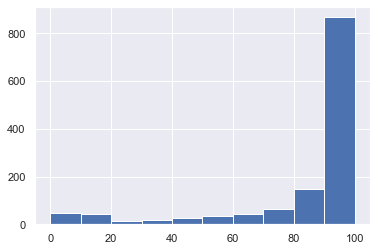

In [36]:
Chembl['value'].hist()

## Combine all datasets

In [37]:

df_all = Chembl.copy(deep=True)

In [38]:
df_all['source'].nunique(),df_all.shape

(397, (1310, 6))

In [39]:

df_all = df_all.dropna(subset = ['Smiles','value'])


In [40]:
df_all = process_stage_1(df_all,'Smiles')

100%|████████████████████████████████████████| 1310/1310 [00:00<00:00, 10580.56it/s]


SANITIZE_NONE    1310
Name: Smiles_check, dtype: int64


100%|███████████████████████████████████████| 1310/1310 [00:00<00:00, 984331.47it/s]
1310it [00:01, 921.70it/s] 


Metal in Smiles amount: 0


100%|████████████████████████████████████████| 1310/1310 [00:00<00:00, 10516.77it/s]


## Filter Unrealiable Value

In [41]:
df_all['value'] = df_all['value'].map(float)

<AxesSubplot:>

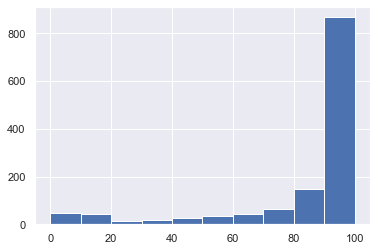

In [42]:
df_all['value'].hist()

In [43]:
df_all.columns

Index(['Smiles', 'value', 'source', 'concentration', 'spec', 'property',
       'Smiles_check', 'Smiles_removesalt', 'Smiles_unify', 'AtomCounts'],
      dtype='object')

In [44]:
df_all = df_all[['Smiles_unify','Smiles','value', 'source', 'concentration', 'spec',
       'property']]

In [46]:
df_all

,Smiles_unify,Smiles,value,source,concentration,spec,property
4,Nc1noc2ccc(-n3nc(C(F)(F)F)c4c3C(=O)N(c3ccc(-c5...,Nc1noc2ccc(-n3nc(C(F)(F)F)c4c3C(=O)N(c3ccc(-c5...,97.0,CHEMBL900675,NaN,Human Serum,ppb
11,COc1cc(NC(C(=O)c2c[nH]c3ccccc23)c2ccccc2)cc(OC...,COc1cc(NC(C(=O)c2c[nH]c3ccccc23)c2ccccc2)cc(OC...,99.0,CHEMBL4200986,NaN,Human,ppb
14,O=C(O)C[C@H](NC(=O)Cn1c(C2CC2)cnc(NCc2ccc3c(n2...,O=C(O)C[C@H](NC(=O)Cn1c(C2CC2)cnc(NCc2ccc3c(n2...,97.5,CHEMBL619354,NaN,Human,ppb
15,CN1CCN(Nc2ncc(Nc3ccc4c(Nc5cnccn5)ccnc4c3)cn2)CC1,CN1CCN(Nc2ncc(Nc3ccc4c(Nc5cnccn5)ccnc4c3)cn2)CC1,51.0,CHEMBL4373163,NaN,Human,ppb
19,N#Cc1cc(F)cc(Oc2ccc3c(c2C(F)F)[C@@H](O)C(F)(F)...,N#Cc1cc(F)cc(Oc2ccc3c(c2C(F)F)[C@@H](O)C(F)(F)...,63.0,CHEMBL4158411,10 uM,Human Plasma,ppb
...,...,...,...,...,...,...,...
3380,C#CCOc1ncc(F)c(OCC#C)n1,C#CCOc1ncc(F)c(OCC#C)n1,85.8,CHEMBL5156881,5 uM,Human Plasma,ppb
3383,CCOc1ccccc1NC(=O)c1cc(C)ccc1NS(=O)(=O)C1CC1,CCOc1ccccc1NC(=O)c1cc(C)ccc1NS(=O)(=O)C1CC1,0.3,CHEMBL5167414,NaN,Human,ppb
3384,CCOc1ccc(F)cc1NC(=O)c1cc(Cl)ccc1NS(=O)(=O)C1CC1,CCOc1ccc(F)cc1NC(=O)c1cc(Cl)ccc1NS(=O)(=O)C1CC1,0.1,CHEMBL5167414,NaN,Human,ppb
3387,COc1ccc2ccc(=O)n(CCN[C@H]3CC[C@H]4[C@@H](C3)OC...,COc1ccc2ccc(=O)n(CCN[C@H]3CC[C@H]4[C@@H](C3)OC...,8.1,CHEMBL5146138,NaN,Human,ppb


In [45]:
df_all.to_csv('../data/data_processing_result/ppb_preprocessing_finished.csv',index=False)